In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features6.csv')
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,English Type
0,0.464441,1348.509341,1625.523338,2463.170509,0.035927,-351.79230,147.745390,19.917744,31.775644,23.516031,2.070087,9.844380,0.265172,-2.338450,-1.322878,-9.483175,-1.679585,-0.177087,0
1,0.466245,3418.700579,3223.002127,6119.662553,0.107384,-410.52670,125.953590,-20.461075,17.156311,-6.669661,15.239104,-16.752926,-3.614888,-5.258536,-7.771095,-2.448791,-5.192124,-2.269287,0
2,0.378031,4684.841227,4088.115737,8508.831711,0.141358,-342.62964,78.433655,12.540177,31.937393,-2.213818,15.747808,-39.245610,-5.218530,-16.471539,-5.059716,-14.047500,-2.351587,-14.914782,0
3,0.395282,2946.916209,2521.878443,5498.743879,0.099481,-331.50244,108.531410,-21.552880,42.042065,-4.467168,9.407474,1.117538,-26.776285,-9.033010,-18.285458,5.542378,1.801108,-12.343457,1
4,0.526733,3757.551713,4111.206588,7823.569504,0.072146,-306.30480,105.473820,-2.033697,33.645050,19.767216,14.690701,-7.823933,16.233910,1.511278,-1.097624,-4.256559,5.822567,-5.417769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.371023,1633.642552,1746.544797,3167.257783,0.047966,-367.42440,153.012450,-6.412210,19.019106,17.933186,-5.957310,-0.477651,-18.703012,-15.582651,-1.840943,-12.552829,-8.802483,-3.864208,1
2134,0.541542,2592.552565,2935.536542,4859.888606,0.058054,-321.66678,128.274500,-3.335473,28.203968,15.083783,16.396720,4.090911,10.306094,2.037651,0.225633,1.150143,1.580174,-2.241047,0
2135,0.407605,4251.225723,4175.493197,8868.443411,0.104116,-253.21036,93.182236,9.850489,38.595917,-14.542635,16.471262,-13.102000,20.879627,-8.502631,6.002625,12.753398,2.869624,-1.761060,0
2136,0.483206,2043.299739,1943.271121,3852.628262,0.067764,-322.13104,150.674900,-11.696100,24.301128,10.992788,-7.354234,20.903921,-4.221878,-11.789002,8.365523,-4.948959,-10.440193,-3.944272,0


In [3]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1710, 18) (1710,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=32,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
54/54 [==============================] - 2s 8ms/step - loss: 1.1026 - val_loss: 0.9669
Epoch 2/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.8657 - val_loss: 0.8080
Epoch 3/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.7632 - val_loss: 0.7511
Epoch 4/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.7209 - val_loss: 0.7211
Epoch 5/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.6956 - val_loss: 0.7003
Epoch 6/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.6769 - val_loss: 0.6836
Epoch 7/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.6619 - val_loss: 0.6699
Epoch 8/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.6496 - val_loss: 0.6585
Epoch 9/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.6396 - val_loss: 0.6492
Epoch 10/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.6315 - val_loss: 0.6417

54/54 [==============================] - 0s 3ms/step - loss: 0.5796 - val_loss: 0.5901
Epoch 83/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5796 - val_loss: 0.5900
Epoch 84/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5795 - val_loss: 0.5900
Epoch 85/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5795 - val_loss: 0.5900
Epoch 86/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5795 - val_loss: 0.5900
Epoch 87/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5899
Epoch 88/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5899
Epoch 89/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5898
Epoch 90/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5898
Epoch 91/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5793 - val_loss: 0.5898
Epoc

54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 163/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 164/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5888
Epoch 165/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 166/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 167/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 168/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 169/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 170/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5887
Epoch 171/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5783 - val_loss: 0.

54/54 [==============================] - 0s 4ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 243/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5780 - val_loss: 0.5884
Epoch 244/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5780 - val_loss: 0.5884
Epoch 245/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5884
Epoch 246/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 247/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 248/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 249/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 250/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.5883
Epoch 251/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5780 - val_loss: 0.

54/54 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 323/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 324/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 325/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 326/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 327/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 328/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 329/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 330/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.5881
Epoch 331/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5778 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 403/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5880
Epoch 404/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5880
Epoch 405/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 406/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5879
Epoch 407/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 408/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 409/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5777 - val_loss: 0.5880
Epoch 410/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 411/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 483/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 484/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 485/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 486/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 487/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 488/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5879
Epoch 489/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 490/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5878
Epoch 491/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 563/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 564/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 565/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 566/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 567/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 568/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 569/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 570/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5879
Epoch 571/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 643/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 644/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 645/1500
54/54 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 646/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 647/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 648/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 649/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 650/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 651/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 723/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 724/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 725/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 726/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 727/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 728/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 729/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 730/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 731/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 803/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 804/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 805/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 806/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5878
Epoch 807/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 808/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 809/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 810/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 811/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 883/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5877
Epoch 884/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 885/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 886/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 887/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 888/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 889/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5878
Epoch 890/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5775 - val_loss: 0.5878
Epoch 891/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.

54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 963/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 964/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 965/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 966/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 967/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 968/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 969/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 970/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 971/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.

54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1043/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 1044/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1045/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 1046/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1047/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 1048/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1049/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5877
Epoch 1050/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1051/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val

54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1122/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5876
Epoch 1123/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1124/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1125/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1126/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1127/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1128/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1129/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.5876
Epoch 1130/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5774 - val

54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1201/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1202/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1203/1500
54/54 [==============================] - 0s 5ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1204/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1205/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1206/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1207/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1208/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1209/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val

54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1280/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1281/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1282/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1283/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1284/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1285/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1286/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5875
Epoch 1287/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1288/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5773 - val

54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5875
Epoch 1359/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5772 - val_loss: 0.5875
Epoch 1360/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1361/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1362/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1363/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1364/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1365/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1366/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5773 - val_loss: 0.5874
Epoch 1367/1500
54/54 [==============================] - 0s 4ms/step - loss: 0.5772 - val

54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1438/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1439/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1440/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1441/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1442/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1443/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1444/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1445/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5874
Epoch 1446/1500
54/54 [==============================] - 0s 3ms/step - loss: 0.5772 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8177570093457944
Precision:  0.6687265263341776
Recall:  0.8177570093457944
F1-score:  0.7357710881003291
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       350
           1       0.00      0.00      0.00        78

    accuracy                           0.82       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.67      0.82      0.74       428



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 80.61%


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


# Print classification report
print(classification_report(y_test, y_pred))



Accuracy:  0.8060747663551402
Precision:  0.742941345549052
Recall:  0.8060747663551402
F1-score:  0.7546347830910722
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       350
           1       0.37      0.09      0.14        78

    accuracy                           0.81       428
   macro avg       0.60      0.53      0.52       428
weighted avg       0.74      0.81      0.75       428



# CNN

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [12]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [14]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [15]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=32,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
47/47 [==============================] - 2s 14ms/step - loss: 34.8892 - accuracy: 0.7233 - val_loss: 1.1907 - val_accuracy: 0.6994
Epoch 2/1500
47/47 [==============================] - 0s 7ms/step - loss: 7.6301 - accuracy: 0.7279 - val_loss: 1.1364 - val_accuracy: 0.8131
Epoch 3/1500
47/47 [==============================] - 0s 7ms/step - loss: 3.2089 - accuracy: 0.7279 - val_loss: 0.6421 - val_accuracy: 0.7991
Epoch 4/1500
47/47 [==============================] - 0s 7ms/step - loss: 1.3300 - accuracy: 0.7353 - val_loss: 0.5169 - val_accuracy: 0.8131
Epoch 5/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.6972 - accuracy: 0.7807 - val_loss: 0.5494 - val_accuracy: 0.7368
Epoch 6/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.5420 - accuracy: 0.7955 - val_loss: 0.5136 - val_accuracy: 0.7835
Epoch 7/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4926 - accuracy: 0.8162 - val_loss: 0.5166 - val_accuracy: 0.7882
Epoc

47/47 [==============================] - 0s 7ms/step - loss: 0.3598 - accuracy: 0.8469 - val_loss: 0.5018 - val_accuracy: 0.8115
Epoch 59/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3530 - accuracy: 0.8603 - val_loss: 0.5264 - val_accuracy: 0.8115
Epoch 60/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.3603 - accuracy: 0.8483 - val_loss: 0.5045 - val_accuracy: 0.8178
Epoch 61/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3569 - accuracy: 0.8476 - val_loss: 0.5083 - val_accuracy: 0.8193
Epoch 62/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8489 - val_loss: 0.5198 - val_accuracy: 0.8053
Epoch 63/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.3628 - accuracy: 0.8483 - val_loss: 0.5037 - val_accuracy: 0.8084
Epoch 64/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3401 - accuracy: 0.8556 - val_loss: 0.5005 - val_accuracy: 0.8162
Epoch 65/1500

47/47 [==============================] - 0s 8ms/step - loss: 0.3038 - accuracy: 0.8723 - val_loss: 0.5812 - val_accuracy: 0.8037
Epoch 116/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3195 - accuracy: 0.8676 - val_loss: 0.5521 - val_accuracy: 0.8131
Epoch 117/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2931 - accuracy: 0.8790 - val_loss: 0.5591 - val_accuracy: 0.8037
Epoch 118/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3168 - accuracy: 0.8697 - val_loss: 0.5980 - val_accuracy: 0.8146
Epoch 119/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.8683 - val_loss: 0.5944 - val_accuracy: 0.8131
Epoch 120/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.8703 - val_loss: 0.5962 - val_accuracy: 0.8006
Epoch 121/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2830 - accuracy: 0.8757 - val_loss: 0.5961 - val_accuracy: 0.8069
Epoch 1

Epoch 172/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.8910 - val_loss: 0.6961 - val_accuracy: 0.7913
Epoch 173/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.8951 - val_loss: 0.7476 - val_accuracy: 0.7991
Epoch 174/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2437 - accuracy: 0.8964 - val_loss: 0.6599 - val_accuracy: 0.7944
Epoch 175/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy: 0.9078 - val_loss: 0.6808 - val_accuracy: 0.7960
Epoch 176/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.9017 - val_loss: 0.7109 - val_accuracy: 0.8006
Epoch 177/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2626 - accuracy: 0.8877 - val_loss: 0.6962 - val_accuracy: 0.7835
Epoch 178/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.8884 - val_loss: 0.6900 - val_accuracy:

Epoch 229/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2217 - accuracy: 0.9144 - val_loss: 0.8070 - val_accuracy: 0.7850
Epoch 230/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.1797 - accuracy: 0.9278 - val_loss: 0.8000 - val_accuracy: 0.7773
Epoch 231/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1978 - accuracy: 0.9225 - val_loss: 0.7949 - val_accuracy: 0.7788
Epoch 232/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.2044 - accuracy: 0.9164 - val_loss: 0.8212 - val_accuracy: 0.7913
Epoch 233/1500
47/47 [==============================] - 1s 16ms/step - loss: 0.1977 - accuracy: 0.9164 - val_loss: 0.8684 - val_accuracy: 0.7757
Epoch 234/1500
47/47 [==============================] - 1s 14ms/step - loss: 0.1909 - accuracy: 0.9171 - val_loss: 0.8735 - val_accuracy: 0.7726
Epoch 235/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.2190 - accuracy: 0.9051 - val_loss: 0.8408 - val_accura

47/47 [==============================] - 1s 11ms/step - loss: 0.1888 - accuracy: 0.9151 - val_loss: 0.9222 - val_accuracy: 0.7741
Epoch 286/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1788 - accuracy: 0.9285 - val_loss: 0.9150 - val_accuracy: 0.7819
Epoch 287/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1739 - accuracy: 0.9225 - val_loss: 0.9194 - val_accuracy: 0.7850
Epoch 288/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1452 - accuracy: 0.9398 - val_loss: 0.9753 - val_accuracy: 0.7741
Epoch 289/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1615 - accuracy: 0.9345 - val_loss: 0.9414 - val_accuracy: 0.7866
Epoch 290/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.2105 - accuracy: 0.9184 - val_loss: 0.9202 - val_accuracy: 0.7819
Epoch 291/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1691 - accuracy: 0.9285 - val_loss: 0.9877 - val_accuracy: 0.7882


47/47 [==============================] - 0s 11ms/step - loss: 0.1441 - accuracy: 0.9439 - val_loss: 0.9962 - val_accuracy: 0.7835
Epoch 342/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.1309 - accuracy: 0.9505 - val_loss: 1.0131 - val_accuracy: 0.7804
Epoch 343/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1425 - accuracy: 0.9405 - val_loss: 0.9597 - val_accuracy: 0.7850
Epoch 344/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1572 - accuracy: 0.9398 - val_loss: 1.0344 - val_accuracy: 0.7819
Epoch 345/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.1234 - accuracy: 0.9512 - val_loss: 1.0747 - val_accuracy: 0.7897
Epoch 346/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1351 - accuracy: 0.9499 - val_loss: 1.0292 - val_accuracy: 0.7850
Epoch 347/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1377 - accuracy: 0.9499 - val_loss: 1.0660 - val_accuracy: 0.7897


47/47 [==============================] - 1s 11ms/step - loss: 0.1338 - accuracy: 0.9519 - val_loss: 1.1458 - val_accuracy: 0.7866
Epoch 398/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.1158 - accuracy: 0.9559 - val_loss: 1.1097 - val_accuracy: 0.7788
Epoch 399/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.1385 - accuracy: 0.9385 - val_loss: 1.1135 - val_accuracy: 0.7913
Epoch 400/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1068 - accuracy: 0.9539 - val_loss: 1.1241 - val_accuracy: 0.7960
Epoch 401/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1273 - accuracy: 0.9472 - val_loss: 1.1507 - val_accuracy: 0.7664
Epoch 402/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1372 - accuracy: 0.9479 - val_loss: 1.1939 - val_accuracy: 0.7788
Epoch 403/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9559 - val_loss: 1.1897 - val_accuracy: 0.7835


47/47 [==============================] - 1s 11ms/step - loss: 0.0958 - accuracy: 0.9632 - val_loss: 1.2453 - val_accuracy: 0.7804
Epoch 454/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1299 - accuracy: 0.9552 - val_loss: 1.1525 - val_accuracy: 0.7850
Epoch 455/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1093 - accuracy: 0.9606 - val_loss: 1.1981 - val_accuracy: 0.7835
Epoch 456/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1074 - accuracy: 0.9606 - val_loss: 1.2200 - val_accuracy: 0.7741
Epoch 457/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1199 - accuracy: 0.9532 - val_loss: 1.2376 - val_accuracy: 0.7741
Epoch 458/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0950 - accuracy: 0.9626 - val_loss: 1.3133 - val_accuracy: 0.7866
Epoch 459/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1022 - accuracy: 0.9525 - val_loss: 1.2790 - val_accuracy: 0.7850


47/47 [==============================] - 0s 10ms/step - loss: 0.0928 - accuracy: 0.9599 - val_loss: 1.2218 - val_accuracy: 0.7897
Epoch 510/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1096 - accuracy: 0.9572 - val_loss: 1.3166 - val_accuracy: 0.7866
Epoch 511/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1023 - accuracy: 0.9619 - val_loss: 1.3525 - val_accuracy: 0.7882
Epoch 512/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1003 - accuracy: 0.9619 - val_loss: 1.2434 - val_accuracy: 0.7757
Epoch 513/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0931 - accuracy: 0.9592 - val_loss: 1.2767 - val_accuracy: 0.7773
Epoch 514/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9612 - val_loss: 1.3332 - val_accuracy: 0.7975
Epoch 515/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9666 - val_loss: 1.2764 - val_accuracy: 0.7757
Ep

Epoch 566/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0897 - accuracy: 0.9666 - val_loss: 1.2437 - val_accuracy: 0.7850
Epoch 567/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1073 - accuracy: 0.9572 - val_loss: 1.2867 - val_accuracy: 0.7757
Epoch 568/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1131 - accuracy: 0.9545 - val_loss: 1.3344 - val_accuracy: 0.7928
Epoch 569/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1020 - accuracy: 0.9552 - val_loss: 1.2963 - val_accuracy: 0.7788
Epoch 570/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0955 - accuracy: 0.9606 - val_loss: 1.2675 - val_accuracy: 0.7882
Epoch 571/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1030 - accuracy: 0.9599 - val_loss: 1.2479 - val_accuracy: 0.7819
Epoch 572/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.9599 - val_loss: 1.2323 - val_ac

47/47 [==============================] - 0s 10ms/step - loss: 0.0796 - accuracy: 0.9666 - val_loss: 1.4540 - val_accuracy: 0.7866
Epoch 623/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1067 - accuracy: 0.9626 - val_loss: 1.4679 - val_accuracy: 0.7819
Epoch 624/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0767 - accuracy: 0.9713 - val_loss: 1.4212 - val_accuracy: 0.7788
Epoch 625/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0912 - accuracy: 0.9672 - val_loss: 1.3858 - val_accuracy: 0.7897
Epoch 626/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1037 - accuracy: 0.9626 - val_loss: 1.3469 - val_accuracy: 0.7819
Epoch 627/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0983 - accuracy: 0.9666 - val_loss: 1.3646 - val_accuracy: 0.7960
Epoch 628/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0857 - accuracy: 0.9672 - val_loss: 1.4141 - val_accuracy: 0.7866
Ep

47/47 [==============================] - 0s 9ms/step - loss: 0.0744 - accuracy: 0.9699 - val_loss: 1.3840 - val_accuracy: 0.7819
Epoch 679/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0880 - accuracy: 0.9713 - val_loss: 1.5044 - val_accuracy: 0.7866
Epoch 680/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0913 - accuracy: 0.9699 - val_loss: 1.5060 - val_accuracy: 0.7897
Epoch 681/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0988 - accuracy: 0.9619 - val_loss: 1.4626 - val_accuracy: 0.7835
Epoch 682/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1779 - accuracy: 0.9572 - val_loss: 1.4829 - val_accuracy: 0.7850
Epoch 683/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1056 - accuracy: 0.9586 - val_loss: 1.3562 - val_accuracy: 0.7788
Epoch 684/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1323 - accuracy: 0.9519 - val_loss: 1.4066 - val_accuracy: 0.7695
Epo

Epoch 735/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9679 - val_loss: 1.3800 - val_accuracy: 0.7882
Epoch 736/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9699 - val_loss: 1.3548 - val_accuracy: 0.7819
Epoch 737/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0899 - accuracy: 0.9679 - val_loss: 1.3464 - val_accuracy: 0.7913
Epoch 738/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0919 - accuracy: 0.9672 - val_loss: 1.4102 - val_accuracy: 0.7866
Epoch 739/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0614 - accuracy: 0.9766 - val_loss: 1.3620 - val_accuracy: 0.7835
Epoch 740/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0784 - accuracy: 0.9739 - val_loss: 1.4217 - val_accuracy: 0.7835
Epoch 741/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9672 - val_loss: 1.3630 - val_accu

47/47 [==============================] - 0s 10ms/step - loss: 0.0841 - accuracy: 0.9726 - val_loss: 1.4743 - val_accuracy: 0.7913
Epoch 792/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0754 - accuracy: 0.9733 - val_loss: 1.4609 - val_accuracy: 0.7835
Epoch 793/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0731 - accuracy: 0.9739 - val_loss: 1.5296 - val_accuracy: 0.7804
Epoch 794/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0911 - accuracy: 0.9666 - val_loss: 1.4605 - val_accuracy: 0.7897
Epoch 795/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.1038 - accuracy: 0.9586 - val_loss: 1.4490 - val_accuracy: 0.7819
Epoch 796/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0823 - accuracy: 0.9713 - val_loss: 1.3671 - val_accuracy: 0.7928
Epoch 797/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0870 - accuracy: 0.9639 - val_loss: 1.3204 - val_accuracy: 0.8037
E

Epoch 848/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 0.9699 - val_loss: 1.3918 - val_accuracy: 0.7913
Epoch 849/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0774 - accuracy: 0.9746 - val_loss: 1.3628 - val_accuracy: 0.8006
Epoch 850/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0737 - accuracy: 0.9666 - val_loss: 1.3906 - val_accuracy: 0.7835
Epoch 851/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0729 - accuracy: 0.9759 - val_loss: 1.3949 - val_accuracy: 0.7944
Epoch 852/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9766 - val_loss: 1.4028 - val_accuracy: 0.7944
Epoch 853/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0692 - accuracy: 0.9746 - val_loss: 1.3933 - val_accuracy: 0.7897
Epoch 854/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0782 - accuracy: 0.9726 - val_loss: 1.4459 - val_accuracy:

Epoch 905/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 1.6527 - val_accuracy: 0.7882
Epoch 906/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1026 - accuracy: 0.9639 - val_loss: 1.5666 - val_accuracy: 0.7835
Epoch 907/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0699 - accuracy: 0.9713 - val_loss: 1.5665 - val_accuracy: 0.7882
Epoch 908/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0936 - accuracy: 0.9639 - val_loss: 1.6551 - val_accuracy: 0.7757
Epoch 909/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0560 - accuracy: 0.9759 - val_loss: 1.5239 - val_accuracy: 0.7757
Epoch 910/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0733 - accuracy: 0.9713 - val_loss: 1.6003 - val_accuracy: 0.7944
Epoch 911/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0753 - accuracy: 0.9779 - val_loss: 1.5632 - val_accurac

Epoch 962/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9799 - val_loss: 1.4751 - val_accuracy: 0.7804
Epoch 963/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0534 - accuracy: 0.9799 - val_loss: 1.5413 - val_accuracy: 0.7897
Epoch 964/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0755 - accuracy: 0.9746 - val_loss: 1.4749 - val_accuracy: 0.7975
Epoch 965/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0769 - accuracy: 0.9713 - val_loss: 1.5105 - val_accuracy: 0.7928
Epoch 966/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.1010 - accuracy: 0.9679 - val_loss: 1.5332 - val_accuracy: 0.7928
Epoch 967/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0732 - accuracy: 0.9759 - val_loss: 1.6068 - val_accuracy: 0.7991
Epoch 968/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0743 - accuracy: 0.9646 - val_loss: 1.5631 - val_accur

47/47 [==============================] - 0s 9ms/step - loss: 0.0812 - accuracy: 0.9713 - val_loss: 1.5441 - val_accuracy: 0.7850
Epoch 1019/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.0777 - accuracy: 0.9739 - val_loss: 1.5141 - val_accuracy: 0.7788
Epoch 1020/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.0591 - accuracy: 0.9759 - val_loss: 1.6089 - val_accuracy: 0.7757
Epoch 1021/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0560 - accuracy: 0.9793 - val_loss: 1.5286 - val_accuracy: 0.7788
Epoch 1022/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0934 - accuracy: 0.9699 - val_loss: 1.4968 - val_accuracy: 0.7835
Epoch 1023/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9713 - val_loss: 1.4870 - val_accuracy: 0.7866
Epoch 1024/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0670 - accuracy: 0.9733 - val_loss: 1.5305 - val_accuracy: 0.7804

47/47 [==============================] - 0s 10ms/step - loss: 0.0728 - accuracy: 0.9766 - val_loss: 1.5977 - val_accuracy: 0.7944
Epoch 1075/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 0.9853 - val_loss: 1.5629 - val_accuracy: 0.7850
Epoch 1076/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0744 - accuracy: 0.9693 - val_loss: 1.5455 - val_accuracy: 0.7928
Epoch 1077/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0761 - accuracy: 0.9726 - val_loss: 1.5697 - val_accuracy: 0.7913
Epoch 1078/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9786 - val_loss: 1.5971 - val_accuracy: 0.7773
Epoch 1079/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0678 - accuracy: 0.9739 - val_loss: 1.6773 - val_accuracy: 0.7913
Epoch 1080/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0851 - accuracy: 0.9652 - val_loss: 1.5892 - val_accuracy: 0

47/47 [==============================] - 1s 11ms/step - loss: 0.0554 - accuracy: 0.9820 - val_loss: 1.6012 - val_accuracy: 0.7928
Epoch 1131/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0538 - accuracy: 0.9786 - val_loss: 1.6124 - val_accuracy: 0.7928
Epoch 1132/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 1.6964 - val_accuracy: 0.7850
Epoch 1133/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0627 - accuracy: 0.9753 - val_loss: 1.6891 - val_accuracy: 0.7835
Epoch 1134/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0660 - accuracy: 0.9759 - val_loss: 1.6389 - val_accuracy: 0.7835
Epoch 1135/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 1.6928 - val_accuracy: 0.7835
Epoch 1136/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0573 - accuracy: 0.9806 - val_loss: 1.6536 - val_accuracy: 0

47/47 [==============================] - 0s 10ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 1.6385 - val_accuracy: 0.7913
Epoch 1187/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0608 - accuracy: 0.9746 - val_loss: 1.6809 - val_accuracy: 0.7913
Epoch 1188/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0753 - accuracy: 0.9759 - val_loss: 1.5565 - val_accuracy: 0.7757
Epoch 1189/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0592 - accuracy: 0.9799 - val_loss: 1.5821 - val_accuracy: 0.7897
Epoch 1190/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0576 - accuracy: 0.9753 - val_loss: 1.6827 - val_accuracy: 0.7819
Epoch 1191/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0656 - accuracy: 0.9799 - val_loss: 1.6245 - val_accuracy: 0.7804
Epoch 1192/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0511 - accuracy: 0.9813 - val_loss: 1.7045 - val_accuracy: 0

47/47 [==============================] - 0s 10ms/step - loss: 0.0431 - accuracy: 0.9826 - val_loss: 1.6144 - val_accuracy: 0.7928
Epoch 1243/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0586 - accuracy: 0.9793 - val_loss: 1.5579 - val_accuracy: 0.7866
Epoch 1244/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0704 - accuracy: 0.9753 - val_loss: 1.6045 - val_accuracy: 0.7897
Epoch 1245/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0758 - accuracy: 0.9739 - val_loss: 1.6451 - val_accuracy: 0.7913
Epoch 1246/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0684 - accuracy: 0.9733 - val_loss: 1.6529 - val_accuracy: 0.7975
Epoch 1247/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0688 - accuracy: 0.9793 - val_loss: 1.5932 - val_accuracy: 0.7866
Epoch 1248/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0962 - accuracy: 0.9706 - val_loss: 1.4896 - val_accuracy: 0

47/47 [==============================] - 1s 11ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 1.6421 - val_accuracy: 0.7773
Epoch 1299/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0633 - accuracy: 0.9786 - val_loss: 1.6020 - val_accuracy: 0.7788
Epoch 1300/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0520 - accuracy: 0.9813 - val_loss: 1.6221 - val_accuracy: 0.7866
Epoch 1301/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 1.6481 - val_accuracy: 0.7928
Epoch 1302/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0582 - accuracy: 0.9799 - val_loss: 1.6762 - val_accuracy: 0.7866
Epoch 1303/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0570 - accuracy: 0.9806 - val_loss: 1.6541 - val_accuracy: 0.7913
Epoch 1304/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0452 - accuracy: 0.9846 - val_loss: 1.7370 - val_accuracy: 0

47/47 [==============================] - 0s 11ms/step - loss: 0.0593 - accuracy: 0.9773 - val_loss: 1.7747 - val_accuracy: 0.7944
Epoch 1355/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0524 - accuracy: 0.9779 - val_loss: 1.6833 - val_accuracy: 0.7882
Epoch 1356/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0387 - accuracy: 0.9820 - val_loss: 1.7179 - val_accuracy: 0.7944
Epoch 1357/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0403 - accuracy: 0.9833 - val_loss: 1.6541 - val_accuracy: 0.7850
Epoch 1358/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 1.7276 - val_accuracy: 0.8022
Epoch 1359/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 1.6655 - val_accuracy: 0.7975
Epoch 1360/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 1.5801 - val_accuracy: 0

47/47 [==============================] - 1s 11ms/step - loss: 0.0509 - accuracy: 0.9773 - val_loss: 1.6735 - val_accuracy: 0.7928
Epoch 1411/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0466 - accuracy: 0.9826 - val_loss: 1.5809 - val_accuracy: 0.7944
Epoch 1412/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0507 - accuracy: 0.9833 - val_loss: 1.6158 - val_accuracy: 0.7913
Epoch 1413/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 1.6496 - val_accuracy: 0.7928
Epoch 1414/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.9779 - val_loss: 1.5907 - val_accuracy: 0.7804
Epoch 1415/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0558 - accuracy: 0.9779 - val_loss: 1.5731 - val_accuracy: 0.7913
Epoch 1416/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 1.6812 - val_accuracy: 0.79

47/47 [==============================] - 0s 10ms/step - loss: 0.0370 - accuracy: 0.9873 - val_loss: 1.6262 - val_accuracy: 0.7882
Epoch 1467/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9840 - val_loss: 1.7810 - val_accuracy: 0.7913
Epoch 1468/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 1.7502 - val_accuracy: 0.7850
Epoch 1469/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0432 - accuracy: 0.9840 - val_loss: 1.7381 - val_accuracy: 0.7975
Epoch 1470/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0468 - accuracy: 0.9813 - val_loss: 1.7276 - val_accuracy: 0.7804
Epoch 1471/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0454 - accuracy: 0.9820 - val_loss: 1.8968 - val_accuracy: 0.7835
Epoch 1472/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0635 - accuracy: 0.9759 - val_loss: 1.7500 - val_accuracy: 0.

In [16]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 3ms/step
Accuracy: 0.7881619937694704


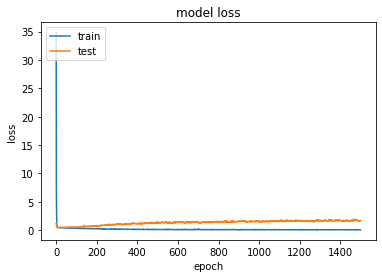

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

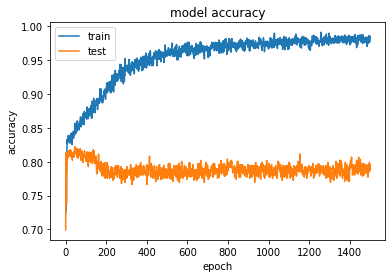

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.83      0.94      0.88       522
           1       0.34      0.14      0.20       120

    accuracy                           0.79       642
   macro avg       0.58      0.54      0.54       642
weighted avg       0.74      0.79      0.75       642

Predict   0         1         
Actual
0         489       33        

1         103       17        





Overall Statistics : 

95% CI                                                            (0.75655,0.81977)
ACC Macro                                                         0.78816
ARI                                                               0.07278
AUNP                                                              0.53922
AUNU                                                              0.53922
Bangdiwala B                                                      0.75997
Bennett S                                                         0.57632
CBA   

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))
print("Precision: ", precision_score(y_test_encoded, y_pred_classes, average='weighted'))
print("Recall: ", recall_score(y_test_encoded, y_pred_classes, average='weighted'))
print("F1-score: ", f1_score(y_test_encoded, y_pred_classes, average='weighted'))


# Print classification report
print(classification_report(y_test_encoded, y_pred_classes))

Accuracy:  0.7881619937694704
Precision:  0.7351698661278101
Recall:  0.7881619937694704
F1-score:  0.7512038792597191
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       522
           1       0.34      0.14      0.20       120

    accuracy                           0.79       642
   macro avg       0.58      0.54      0.54       642
weighted avg       0.74      0.79      0.75       642

